# Exploring Data Visualization, Dimensionality Reduction, and Disentanglement: Synthetic Data Analysis, PCA, and Factor Manipulation
In generative models and machine learning, disentanglement refers to the process of separating complex, mixed features of data into distinct, interpretable components. This allows models to learn and manipulate individual factors independently, improving their ability to generate and understand diverse, high-quality data by isolating aspects like style from content.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

"""
This script demonstrates how to generate synthetic data and perform Principal Component Analysis (PCA) using scikit-learn.

1. **Imports**:
    - `numpy` for numerical operations.
    - `pandas` for data manipulation.
    - `matplotlib.pyplot` for plotting.
    - `PCA` from `sklearn.decomposition` for dimensionality reduction.

2. **Data Generation**:
    - **Seed**: Sets the random seed to ensure reproducibility.
    - **Sample Size**: Defines the number of samples as 500.
    - **Latent Factors**: Generates three independent latent factors (`factor1`, `factor2`, `factor3`) with uniform distribution between -1 and 1.
    - **Data Creation**: Combines these latent factors with interaction terms and random noise to create a dataset `X` with three features.

3. **DataFrame Creation**:
    - Constructs a pandas DataFrame `df` containing the synthetic features and latent factors for convenience.

The generated dataset `df` can be used for demonstrating PCA or other data analysis techniques.
"""


# Generate synthetic data
np.random.seed(42)
n_samples = 500

# Generate three independent latent factors
factor1 = np.random.uniform(-1, 1, n_samples)
factor2 = np.random.uniform(-1, 1, n_samples)
factor3 = np.random.uniform(-1, 1, n_samples)

# Combine factors to create data with some interaction terms
X = np.column_stack((
    0.5 * factor1 + 0.3 * factor2 + 0.2 * factor3 + 0.1 * np.random.normal(size=n_samples),
    0.2 * factor1 - 0.4 * factor2 + 0.6 * factor3 + 0.1 * np.random.normal(size=n_samples),
    0.3 * factor1 + 0.1 * factor2 - 0.2 * factor3 + 0.2 * np.random.normal(size=n_samples)
))

# Create a DataFrame for convenience
df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])
df['Factor1'] = factor1
df['Factor2'] = factor2
df['Factor3'] = factor3


/u/cwinkler/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


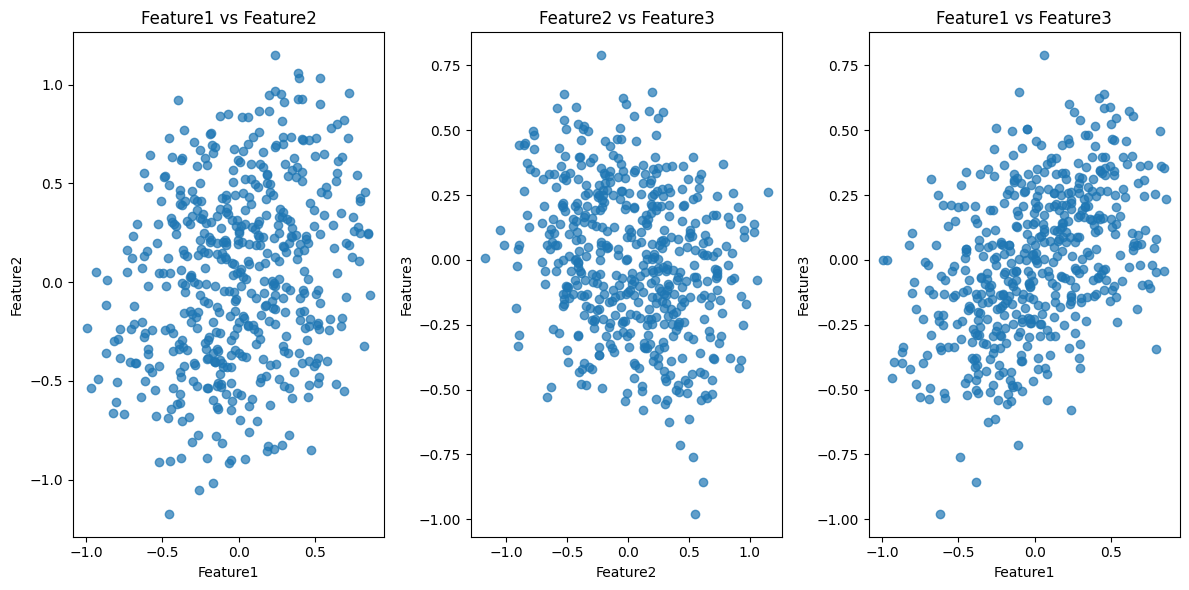

In [4]:
# Set up the figure with a specified size for better visibility
plt.figure(figsize=(12, 6))

# Plot 1: Scatter plot of Feature1 vs Feature2
plt.subplot(1, 3, 1)  # Create the first subplot in a 1x3 grid
plt.scatter(df['Feature1'], df['Feature2'], alpha=0.7)  # Scatter plot with alpha for transparency
plt.xlabel('Feature1')  # Label for the x-axis
plt.ylabel('Feature2')  # Label for the y-axis
plt.title('Feature1 vs Feature2')  # Title for the subplot

# Plot 2: Scatter plot of Feature2 vs Feature3
plt.subplot(1, 3, 2)  # Create the second subplot in a 1x3 grid
plt.scatter(df['Feature2'], df['Feature3'], alpha=0.7)  # Scatter plot with alpha for transparency
plt.xlabel('Feature2')  # Label for the x-axis
plt.ylabel('Feature3')  # Label for the y-axis
plt.title('Feature2 vs Feature3')  # Title for the subplot

# Plot 3: Scatter plot of Feature1 vs Feature3
plt.subplot(1, 3, 3)  # Create the third subplot in a 1x3 grid
plt.scatter(df['Feature1'], df['Feature3'], alpha=0.7)  # Scatter plot with alpha for transparency
plt.xlabel('Feature1')  # Label for the x-axis
plt.ylabel('Feature3')  # Label for the y-axis
plt.title('Feature1 vs Feature3')  # Title for the subplot

# Adjust layout to prevent overlap and ensure plots fit well within the figure
plt.tight_layout()

# Display the plot with all subplots
plt.show()

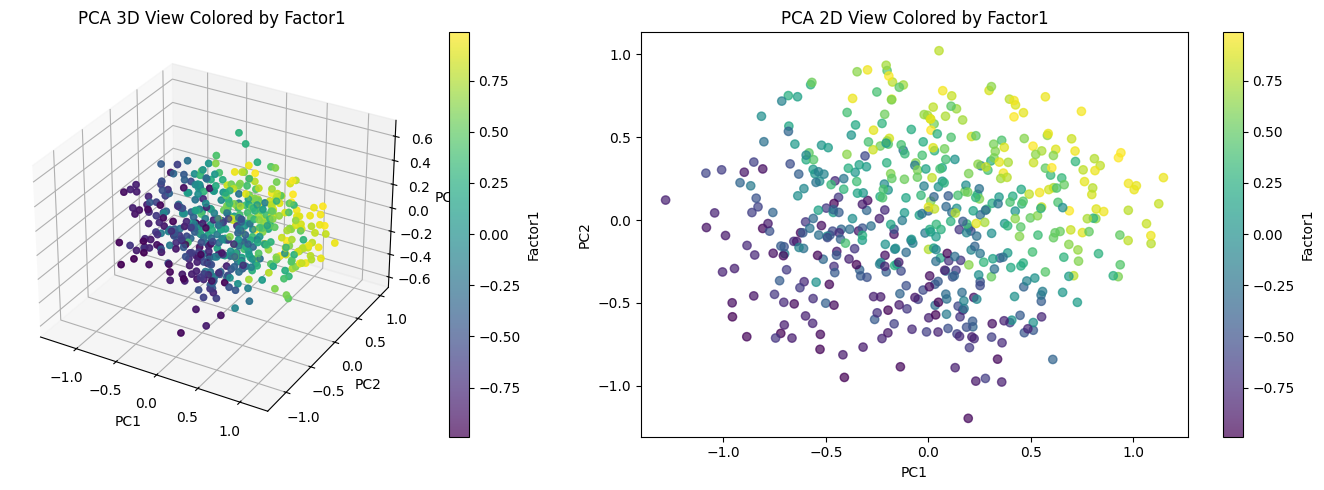

In [5]:
"""
Perform Principal Component Analysis (PCA) on synthetic data and visualize the results.

1. **PCA Fitting**:
   - PCA is applied to reduce the dimensionality of the data to 3 principal components.

2. **PCA Result DataFrame**:
   - A DataFrame `df_pca` is created to hold the PCA results with columns for the first three principal components (PC1, PC2, PC3).

3. **Plotting**:
   - **3D PCA Plot**:
     - A 3D scatter plot of the first three principal components is generated. Points are colored by the values of `Factor1` using the 'viridis' colormap.
     - A color bar is added to indicate the values of `Factor1`.

   - **2D PCA Plot**:
     - A 2D scatter plot of the first two principal components (PC1 vs. PC2) is created. Points are colored by `Factor1`.
     - A color bar is included to reflect `Factor1` values.

4. **Figure Configuration**:
   - The figure size is set to 15x5 inches to accommodate both plots side by side.
   - `plt.tight_layout()` ensures that subplots do not overlap.

This visualization helps in understanding how the data is distributed in the principal component space and how the latent factor influences the projections.
"""


# Fit PCA to the data
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# Plot PCA results
fig = plt.figure(figsize=(15, 5))

# PCA projection onto the first 2 principal components
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df['Factor1'], cmap='viridis', alpha=0.7)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax1.set_title('PCA 3D View Colored by Factor1')
fig.colorbar(ax1.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df['Factor1'], cmap='viridis', alpha=0.7), ax=ax1, label='Factor1')

# PCA projection onto the first 2 principal components (2D)
plt.subplot(1, 2, 2)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df['Factor1'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Factor1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2D View Colored by Factor1')

plt.tight_layout()
plt.show()


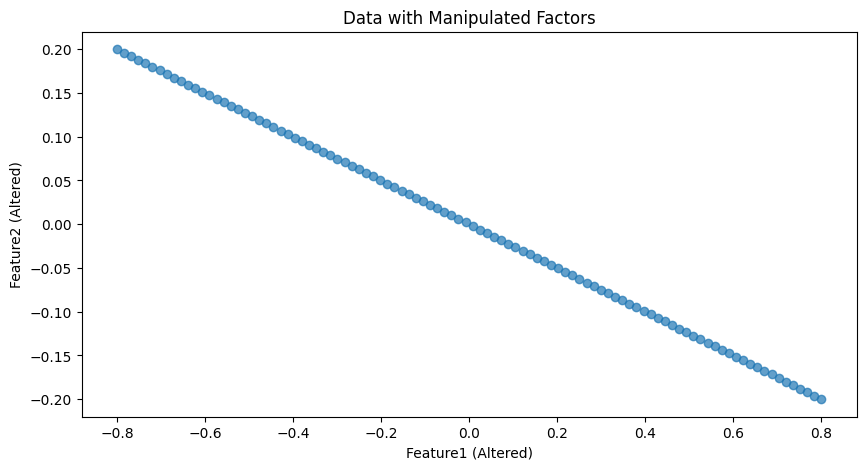

In [6]:
"""
Generate and visualize synthetic data with manipulated latent factors.

1. **Data Generation**:
   - **Number of Samples**: 100 new samples are created.
   - **Manipulated Factors**:
     - `altered_factor1`: Linearly spaced values from -1 to 1.
     - `altered_factor2`: Linearly spaced values from -1 to 1.
     - `altered_factor3`: Set to zero for all samples.
   - **Feature Calculation**: 
     - Constructs a new dataset `altered_X` using the manipulated factors with the same linear combination used previously.

2. **Plotting**:
   - **Scatter Plot**:
     - Plots the first two features of the new data (`Feature1` vs. `Feature2`).
     - The plot shows how the manipulated factors affect the distribution of the features.
     - Features are displayed with transparency (`alpha=0.7`) for better visualization.

3. **Figure Configuration**:
   - **Figure Size**: Set to 10x5 inches to appropriately display the scatter plot.
   - **Labels and Title**: `Feature1 (Altered)` and `Feature2 (Altered)` are labeled on the x and y axes, respectively, with a title indicating the plot shows data with manipulated factors.

This visualization provides insights into how changes in the latent factors impact the feature space.
"""

# Generate new samples with manipulated factors
n_samples = 100
altered_factor1 = np.linspace(-1, 1, n_samples)
altered_factor2 = np.linspace(-1, 1, n_samples)
altered_factor3 = np.zeros(n_samples)

altered_X = np.column_stack((
    0.5 * altered_factor1 + 0.3 * altered_factor2 + 0.2 * altered_factor3,
    0.2 * altered_factor1 - 0.4 * altered_factor2 + 0.6 * altered_factor3,
    0.3 * altered_factor1 + 0.1 * altered_factor2 - 0.2 * altered_factor3
))

plt.figure(figsize=(10, 5))
plt.scatter(altered_X[:, 0], altered_X[:, 1], alpha=0.7)
plt.xlabel('Feature1 (Altered)')
plt.ylabel('Feature2 (Altered)')
plt.title('Data with Manipulated Factors')
plt.show()


### Local Isometry
Refers to the preservation of distances within a small, localized region when mapping data from one space to another. In contexts such as dimensionality reduction or manifold learning, local isometry ensures that the geometric relationships between points are maintained in their immediate vicinity, even if the global structure of the space is complex. 

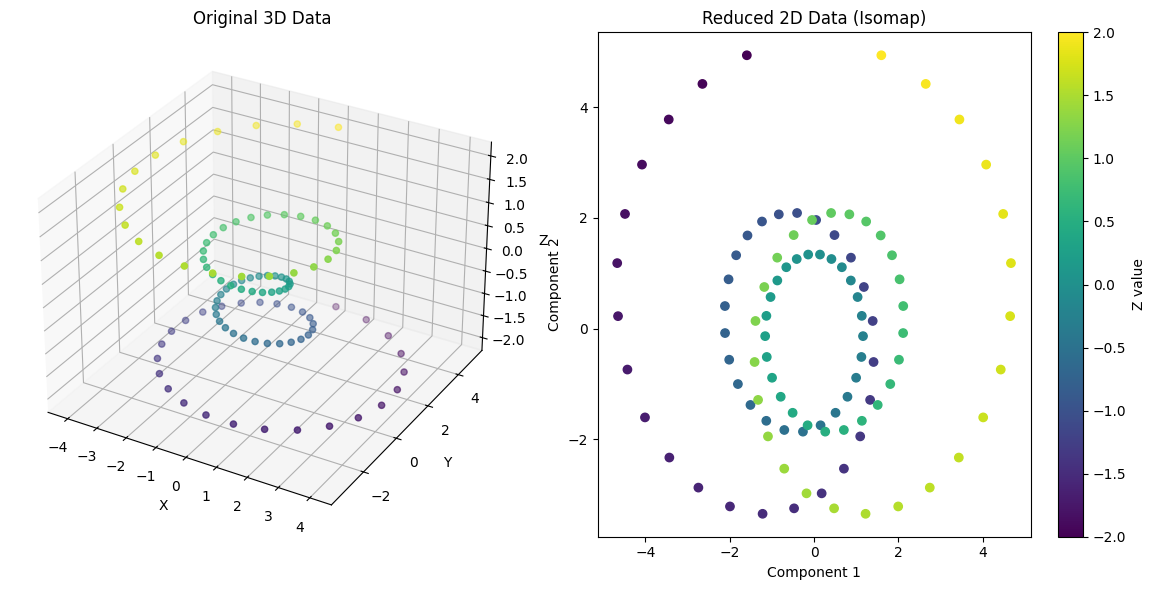

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic 3D data (a spiral)
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
data_3d = np.vstack((x, y, z)).T

# Apply Isomap to reduce dimensions from 3D to 2D
isomap = Isomap(n_neighbors=10, n_components=2)
data_2d = isomap.fit_transform(data_3d)

# Plot original 3D data
fig = plt.figure(figsize=(12, 6))

# 3D Plot
ax = fig.add_subplot(121, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=z, cmap='viridis')
ax.set_title('Original 3D Data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 2D Plot
ax2 = fig.add_subplot(122)
sc = ax2.scatter(data_2d[:, 0], data_2d[:, 1], c=z, cmap='viridis')
ax2.set_title('Reduced 2D Data (Isomap)')
ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
plt.colorbar(sc, ax=ax2, label='Z value')

# Show the plots
plt.tight_layout()
plt.show()


### Generate Non-Gaussian Latent Variables
- generate three latent variables each following a different distribution
- apply a random mixing matrix to generate observed data (simulating how latent features are combined to produce observed features)
- apply ICA to recover the latent variables from the observed data (in this case, we know the latent variables as we generated them)

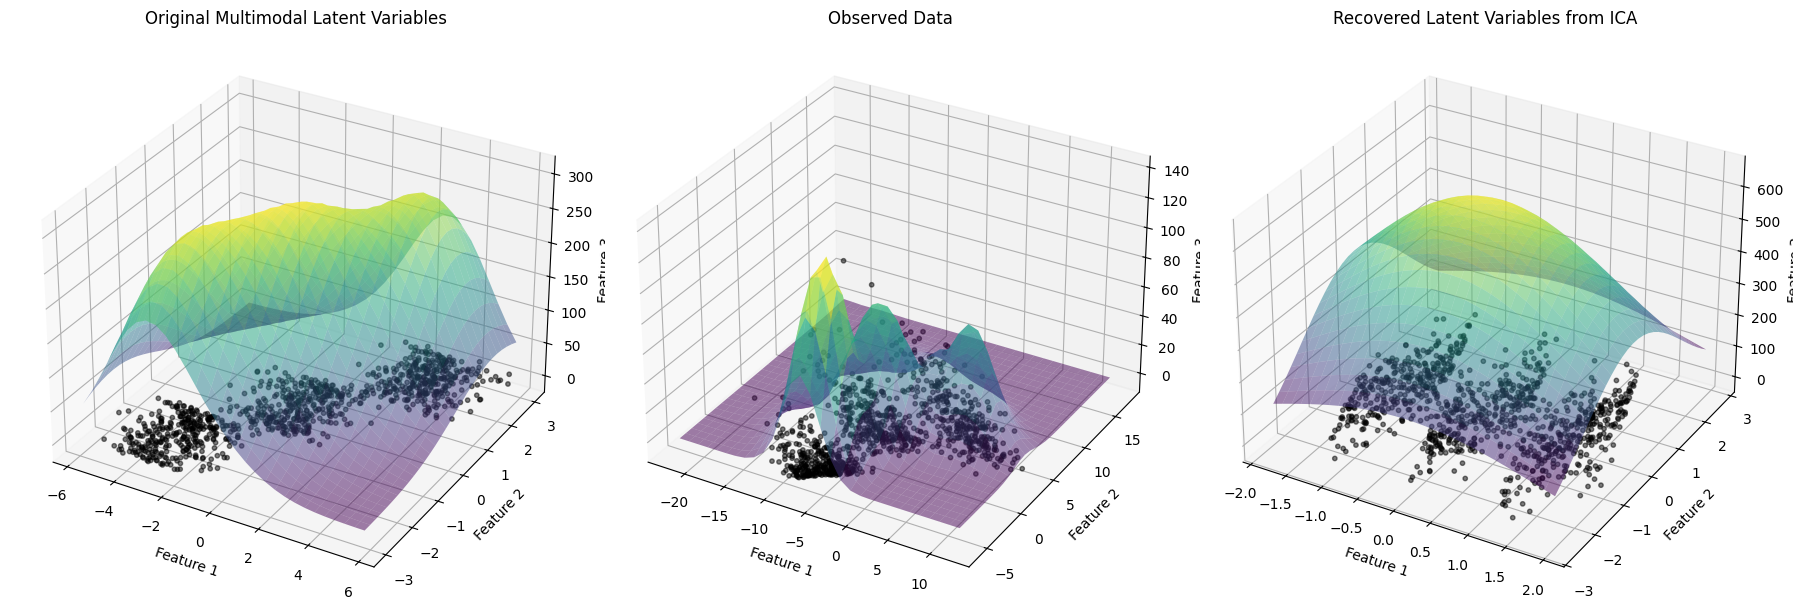

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import FastICA


# Set random seed for reproducibility
np.random.seed(0)

# Parameters
n_samples = 1000
n_latent = 3  # Use 3 latent variables for 3D

# Generate multimodal latent variables
latent1 = np.concatenate([
    np.random.normal(loc=-3, scale=1, size=n_samples//3),
    np.random.normal(loc=0, scale=1, size=n_samples//3),
    np.random.normal(loc=3, scale=1, size=n_samples//3)
])

latent2 = np.concatenate([
    np.random.uniform(-3, -1, size=n_samples//3),
    np.random.uniform(-1, 1, size=n_samples//3),
    np.random.uniform(1, 3, size=n_samples//3)
])

latent3 = np.concatenate([
    np.random.chisquare(df=2, size=n_samples//3) - 2,
    np.random.chisquare(df=5, size=n_samples//3),
    np.random.chisquare(df=10, size=n_samples//3) - 5
])

# Ensure all latent arrays are of the same length
latent1 = latent1[:n_samples]
latent2 = latent2[:n_samples]
latent3 = latent3[:n_samples]

# Stack latent variables to create a matrix
latent_matrix = np.vstack([latent1, latent2, latent3]).T

# Generate mixing matrix
mixing_matrix = np.array([[1, 2, -1], [0.5, 1, 0.5], [0.2, -0.3, 1]])

# Mix the latent variables to simulate observed data
observed_data = latent_matrix @ mixing_matrix.T

# Apply ICA to recover the latent variables
ica = FastICA(n_components=n_latent, random_state=0)
recovered_latent = ica.fit_transform(observed_data)

# Define a function to plot 3D scatter plots with contours
def plot_3d_scatter_with_contours(ax, data, title):
    # Scatter plot
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='k', s=10, alpha=0.5)

    # Create grid and multivariate normal
    x = np.linspace(data[:, 0].min(), data[:, 0].max(), 30)
    y = np.linspace(data[:, 1].min(), data[:, 1].max(), 30)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)

    # Compute density estimates for contour plot
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = np.sum(np.exp(-((data[:, 0] - X[i, j])**2 + (data[:, 1] - Y[i, j])**2) / (2.0**2)))

    # Plot surface
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

# Create subplots
fig = plt.figure(figsize=(18, 12))

# Plot original latent variables
ax1 = fig.add_subplot(231, projection='3d')
plot_3d_scatter_with_contours(ax1, latent_matrix, 'Original Multimodal Latent Variables')

# Plot observed data
ax2 = fig.add_subplot(232, projection='3d')
plot_3d_scatter_with_contours(ax2, observed_data, 'Observed Data')

# Plot recovered latent variables from ICA
ax3 = fig.add_subplot(233, projection='3d')
plot_3d_scatter_with_contours(ax3, recovered_latent, 'Recovered Latent Variables from ICA')

plt.tight_layout()
plt.show()
